1593


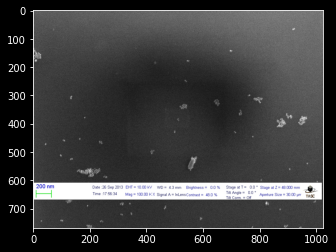

In [18]:
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

files = glob.glob(os.path.join(os.getcwd(), 'Particles/*'))

# Creating an empty list to store the images

images = []

for file in files:
    img = cv2.imread(file)
    images.append(img)

2807


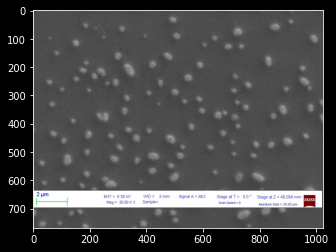

In [21]:
# Plotting a random image from the list
x = np.random.randint(0, len(images))
plt.imshow(images[x])
print(x)

test = images[x]

# Reading the 'dug.jpeg' image

dug = cv2.imread('dug.jpeg')

Text(0.5, 1.0, 'Blue')

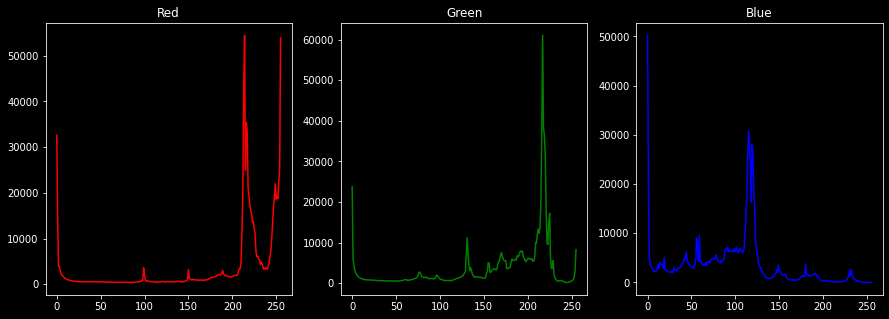

In [10]:
# Probably we will need an histogram of how much information
# is in each color channel, we will use the cv2.calcHist() function

# This histogram shows the distribution of the colors in the image

histred = cv2.calcHist([rocko], [2], None , [256], [0, 256])
histgreen = cv2.calcHist([rocko], [1], None, [256], [0, 256])
histblue = cv2.calcHist([rocko], [0], None, [256], [0, 256])

# Plotting the histograms

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(histred, color='red')
ax[0].set_title('Red')
ax[1].plot(histgreen, color='green')
ax[1].set_title('Green')
ax[2].plot(histblue, color='blue')
ax[2].set_title('Blue')

(768, 1024, 3)

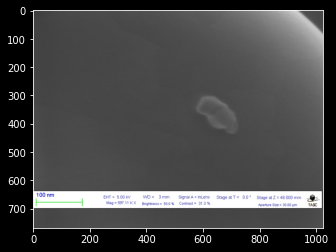

In [12]:
import cv2
import os
import glob

files = glob.glob(os.path.join(os.getcwd(), 'SemImages/*'))

# Reading the first image

img = cv2.imread(files[0])

# Displaying the image with matplotlib

import matplotlib.pyplot as plt

plt.imshow(img)

In [13]:
# Now we apply several masks with cv2 to the image to get an idea
# of how can we create a mask to get the particles

# We create a variable to see how the mask affects the image

images = []

for a in range(0, 256, 20):
    mask = cv2.inRange(img, (a,a,a), (255,255,255))
    images.append(mask)

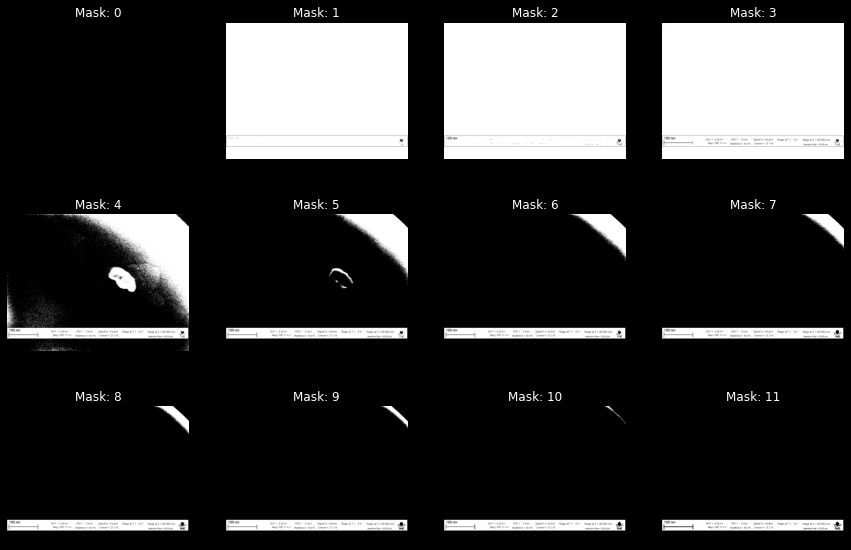

In [14]:
# Showing the first 12 images

fig, ax = plt.subplots(3, 4, figsize=(15, 10))
for i in range(3):
    for j in range(4):
        ax[i, j].imshow(images[i*4+j], cmap='gray')
        ax[i, j].set_title('Mask: '+str(i*4+j))
        ax[i, j].axis('off')


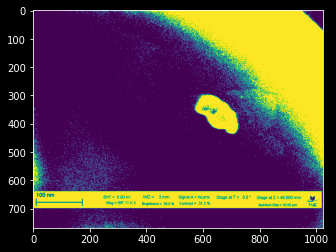

In [15]:
# Accessing the first image

im1 =  images[4]

# Visualizing the image

plt.imshow(im1)

In [25]:
# We can save the image with cv2.imwrite() to the
# 'Particles2/' folder

i=0
for im in images:
    cv2.imwrite('Particles2/'+str(i)+'.jpg', im)
    i+=1


In [1]:
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

files = glob.glob(os.path.join(os.getcwd(), 'Particles2/*'))

# Creating an empty list to store the images

images = []

for file in files:
    img = cv2.imread(file)
    images.append(img)

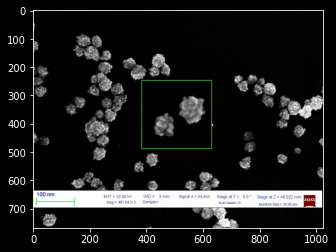

In [4]:
plt.imshow(images[1592])

In [11]:
# Printing the image shape

print(images[1592].shape)

(768, 1024, 3)


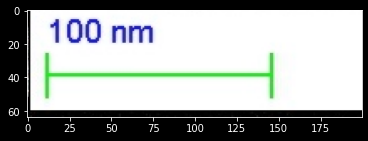

In [23]:
# We cereate a test image to play with the crop function

test = images[1592]

# We can crop the image with cv2

crop = test[636:700, 0:200]

# We can plot the image

plt.imshow(crop)

Text(0.5, 1.0, 'Blue')

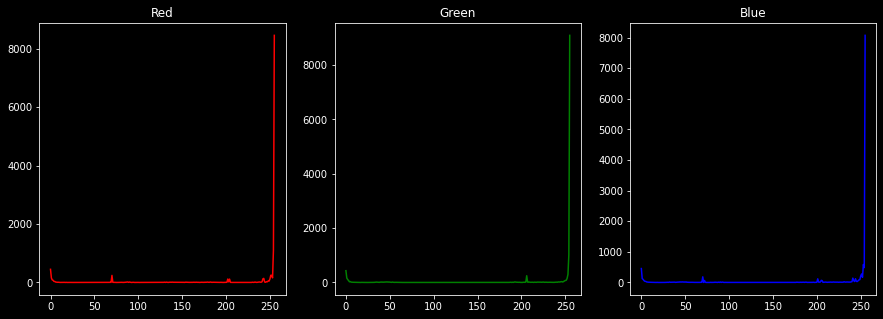

In [25]:
# Getting how much information carries each channel for croped image

histred = cv2.calcHist([crop], [2], None , [256], [0, 256])
histgreen = cv2.calcHist([crop], [1], None, [256], [0, 256])
histblue = cv2.calcHist([crop], [0], None, [256], [0, 256])

# Plotting the histograms

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(histred, color='red')
ax[0].set_title('Red')
ax[1].plot(histgreen, color='green')
ax[1].set_title('Green')
ax[2].plot(histblue, color='blue')
ax[2].set_title('Blue')



In [26]:
# We will make a crop of every image and store this crops in a new list

cropeds = []

for img in images:
    crop = img[636:700, 0:200]
    cropeds.append(crop)

3905
x... :  1062


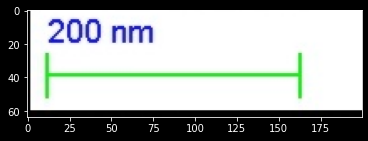

In [56]:
# Printing the shape of the cropeds and a random element we get the following

print(cropeds.__len__())
x = np.random.randint(0, len(cropeds))
plt.imshow(cropeds[x])
print('x... : ',x)


230.0


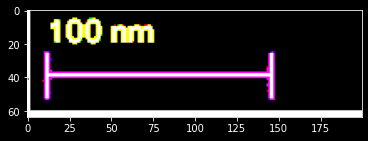

In [71]:
# Applying a treshold we can get the most important pixels
# The treshold type we use is cv2.THRESH_BINARY and other options are
# cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV
# We will use cv2.THRESH_BINARY and cv2.THRESH_BINARY_INV 

ret, thresh = cv2.threshold(cropeds[1592], 230, 255, cv2.THRESH_BINARY_INV)

# Plotting the image

plt.imshow(thresh)

# We can visualize thresh and ret

print(ret)



In [161]:
# Visualizing the tresholded image for various treshold values
# We create a 4 x 10 grid to show the 40 images and then we plot them

toplot = []

for i in np.arange(0, 250, 6):
    toplot.append([i, cv2.threshold(cropeds[1592], i, 255, cv2.THRESH_BINARY_INV)[1]])


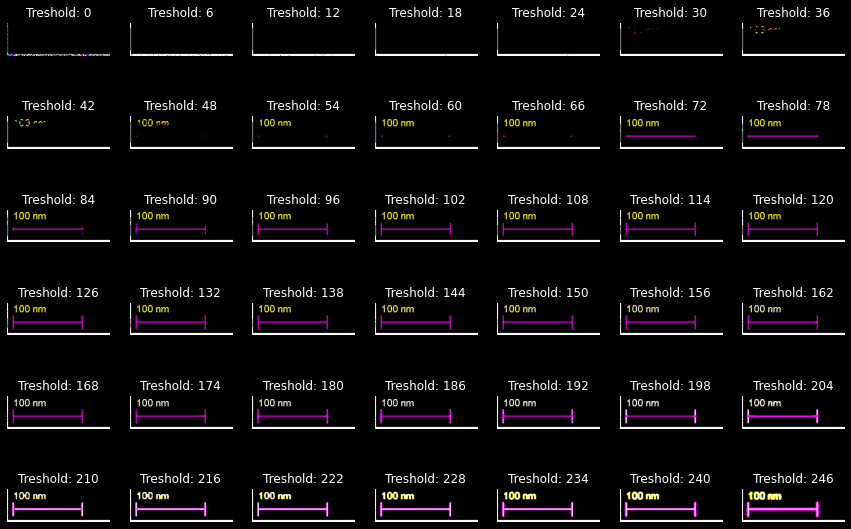

In [163]:
fig, ax = plt.subplots(6, 7, figsize=(15, 10))
for i in range(6):
    for j in range(7):
        ax[i, j].imshow(toplot[i*7+j][1])
        ax[i, j].set_title('Treshold: '+str(toplot[i*7+j][0]))
        ax[i, j].axis('off')

In [169]:
# We plot the 42 images in a 6 x 7 grid

def variableTresholdEffects(img):
    toplot = []

    for i in np.arange(0, 250, 6):
        toplot.append([i, cv2.threshold(img, i, 255, cv2.THRESH_BINARY_INV)[1]])

    fig, ax = plt.subplots(6, 7, figsize=(15, 10))
    for i in range(6):
        for j in range(7):
            ax[i, j].imshow(toplot[i*7+j][1])
            ax[i, j].set_title('Treshold: '+str(toplot[i*7+j][0]))
            ax[i, j].axis('off')

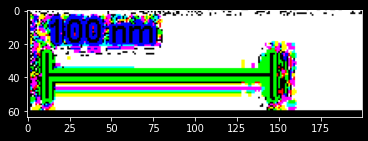

In [170]:
# FIrst we convert the image to its negative

neg = cv2.bitwise_not(cropeds[1592])

# We apply a treshold to the negative image

ret, thresh = cv2.threshold(neg, 0, 255, cv2.THRESH_BINARY_INV)

# We plot the image

plt.imshow(thresh)

# The first cropped image is splitted into its channels

b, g, r = cv2.split(cropeds[1592])

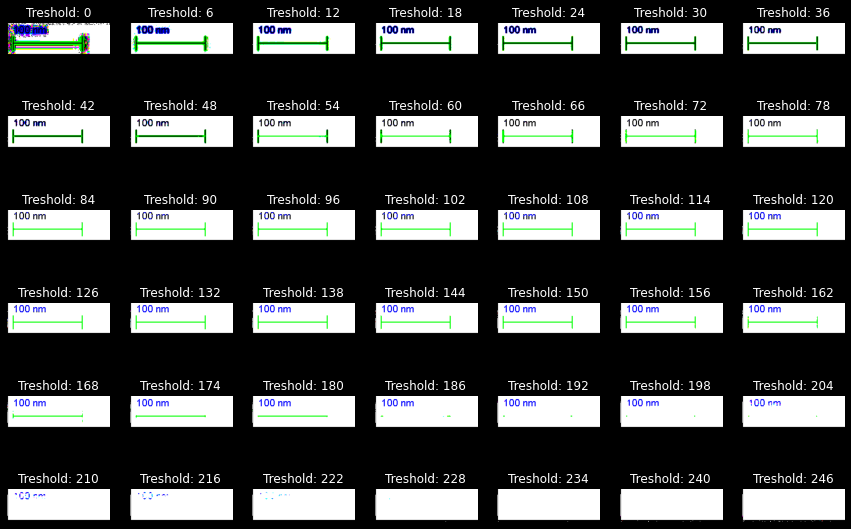

In [172]:
variableTresholdEffects(neg)

Text(0.5, 1.0, 'Red')

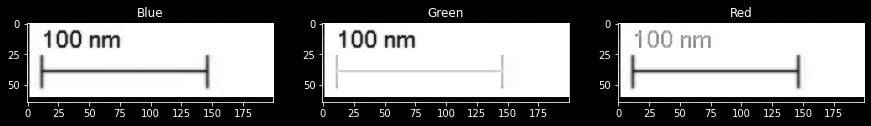

In [164]:
# PLottin the channels

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(b, cmap='gray')
ax[0].set_title('Blue')
ax[1].imshow(g, cmap='gray')
ax[1].set_title('Green')
ax[2].imshow(r, cmap='gray')
ax[2].set_title('Red')

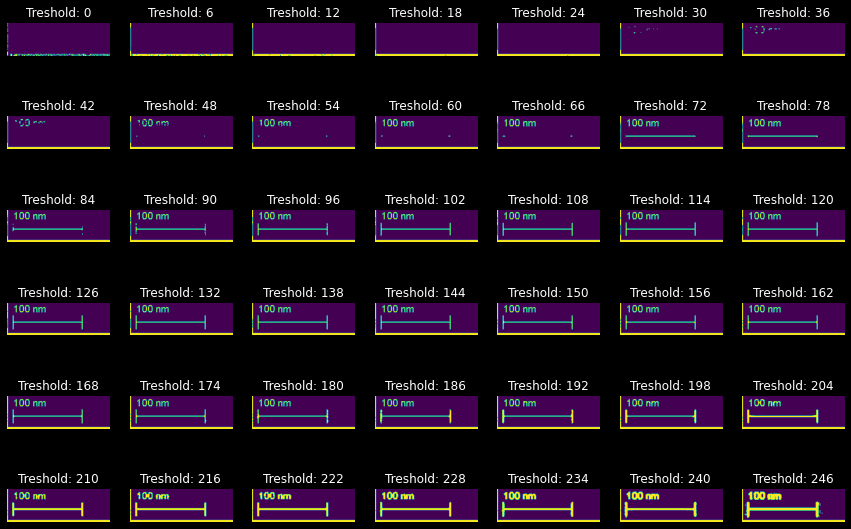

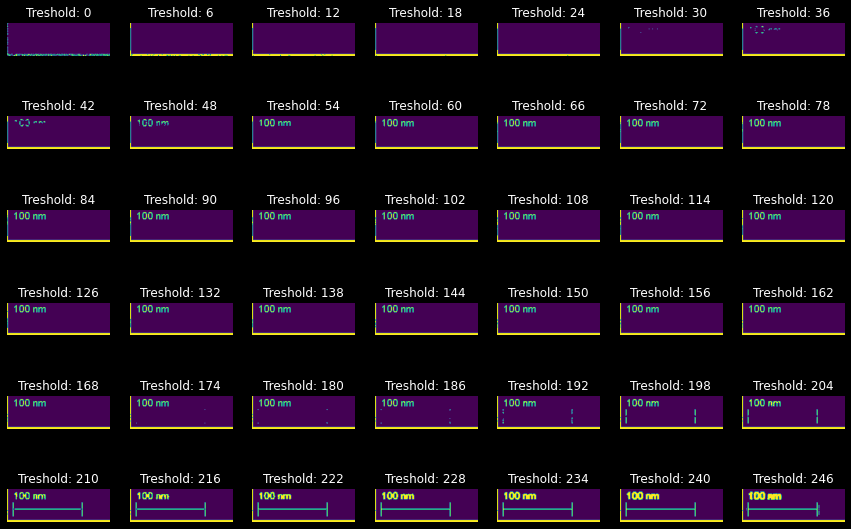

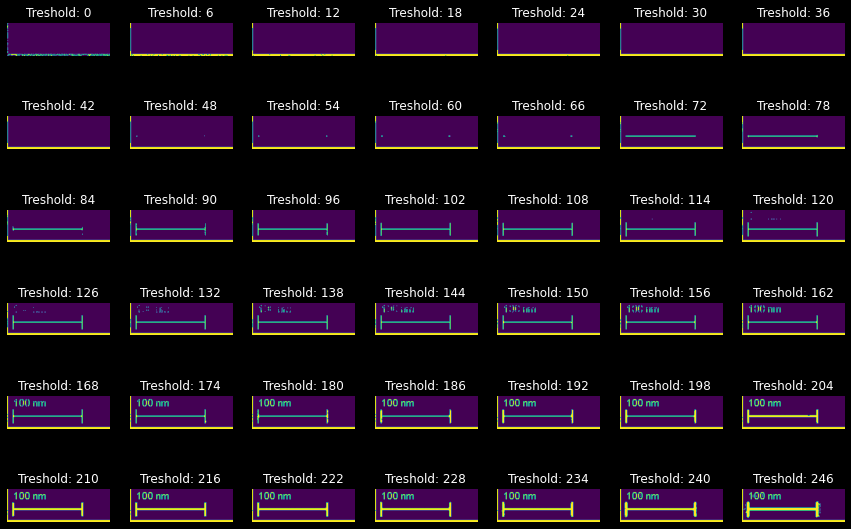

In [173]:
# Applying a treshold to each r,g,b image

variableTresholdEffects(b)
variableTresholdEffects(g)
variableTresholdEffects(r)

In [ ]:
# Here we can see that the channels to extract the bar and the 
# scale are green and red, but some images have scales in blue so lets
# figure out a way to overcome this problem

